In [5]:
import torch
import pyro
import pyro.distributions as dist

import matplotlib.pyplot as plt

In [3]:
# Сгенерируем синтетические данные
torch.manual_seed(42)
observed_data = torch.normal(5, 2, size=(100,))

# Специфицируем байесовскую модель
def model(data):
    mu = pyro.sample("mu", dist.Normal(0, 10))
    sigma = pyro.sample("sigma", dist.HalfNormal(10))
    with pyro.plate("data", len(data)):
        pyro.sample("obs", dist.Normal(mu, sigma), obs=data)

# Запускаем MCMC-алгоритм и получаем семплы
n_samples = 1000
nuts_kernel = pyro.infer.NUTS(model)
mcmc_run = pyro.infer.MCMC(nuts_kernel, num_samples=n_samples, warmup_steps=100)
mcmc_run.run(observed_data)

# Получаем семплы параметров из постериорного распределения
mu_samples = mcmc_run.get_samples()["mu"].numpy()
sigma_samples = mcmc_run.get_samples()["sigma"].numpy()

Sample: 100%|███████████████████████████████████████| 1100/1100 [00:01, 577.27it/s, step size=2.16e-01, acc. prob=0.834]     


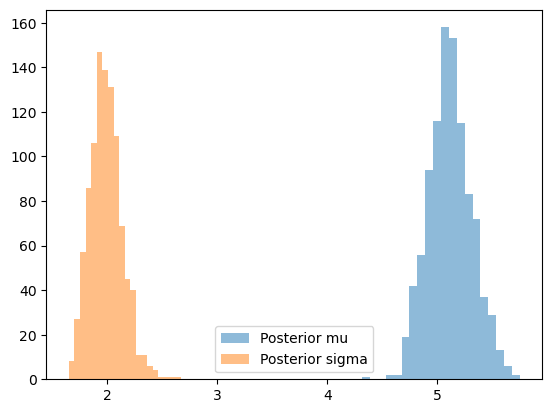

In [6]:
# Визуализация результатов
plt.hist(mu_samples, bins=20, alpha=0.5, label='Posterior mu')
plt.hist(sigma_samples, bins=20, alpha=0.5, label='Posterior sigma')
plt.legend()
plt.show()